In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Timing main table

In [11]:
res_main = {
    "PySCF RI-JK": "0.44	1.39	3.54	7.72	15.11	24.63	40.24	58.86	86.95	121.21	168.59	225.41	303.75	375.58	492.93",
    "PySCF conv-HF": "0.86	22.13	37.69	91.87	172.29	282.46	427.46	600.44	806.73	1050.01	1321.42	1613.21	1946.22	2307.82	2711.72",
    "PySCF RI-MP2": "0.35	1.19	2.32	3.66	6.64	10.89	16.98	25.44	36.75	51.55	68.14	95.77	122.71	159.62	201.03",
    "PySCF conv-MP2": "0.40	8.96	28.28	72.09	152.69	274.00	450.19	711.29	1058.23	1414.44",
    "Implemented RI-MP2": "0.04	0.16	0.36	0.74	1.30	2.28	3.93	6.03	8.34	12.05	20.53	24.48	31.27	44.77	60.47",
    "Implemented LT-OSMP2": "1.01	1.67	1.70	2.16	3.09	4.47	6.54	8.98	12.51	17.26	23.18	29.85	37.38	50.19	62.17",
    "dh RI-MP2": "0.16	0.63	1.73	3.89	7.14	12.87	21.33	33.22	48.74	69.72	99.12	141.29	180.15	241.57	340.02",
    "ORCA RI-JK": "2.78	4.23	7.70	10.76	15.93	22.08	29.57	35.47	47.62	56.74	68.70	84.70	100.78	115.53	135.03",
    "ORCA RI-MP2": "1.98	2.16	2.61	3.10	4.00	5.21	7.46	10.06	18.22	24.50	32.85	43.68	56.46	72.39	93.81",
    "G16 conv-HF": "3.2	22.4	101.6	86.5	159.7	255.8	399.6	553.6	752.1	1006.8	1239.3	1530	1858.1	2268.7	2671.5",
    "G16 conv-MP2": "2.9	21.6	107	324.7	549.9	856.4	1458	2723.7",
    "Psi4 RI-JK": "0.78	1.23	2.48	3.5	5.09	7.64	10.62	13.42	17.35	20.7	26.64	31.25	37.9	45.79	53.75",
    "Psi4 RI-MP2": "0.89	2.24	4.69	8.04	12.67	19.45	28.02	38.27	54.29	69.71	93.51	114.95	146.32	186.69	224.77",
}

In [12]:
for key, val in list(res_main.items()):
    res_main[key] = np.array(val.split(), dtype=float)

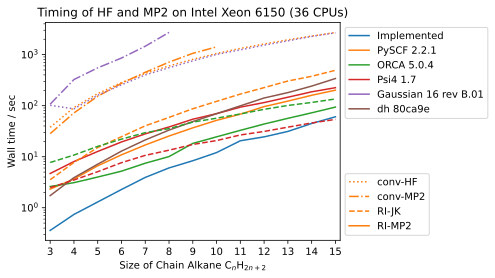

In [44]:
fig, ax = plt.subplots(figsize=(7, 4))

# actual plots
ax.plot(range(3, 16), res_main["Implemented RI-MP2"][2:], c="C0")
ax.plot(range(3, 16), res_main["PySCF RI-MP2"      ][2:], c="C1")
ax.plot(range(3, 16), res_main["ORCA RI-MP2"       ][2:], c="C2")
ax.plot(range(3, 16), res_main["Psi4 RI-MP2"       ][2:], c="C3")
ax.plot(range(3, 16), res_main["dh RI-MP2"         ][2:], c="C5")

ax.plot(range(3, 11), res_main["PySCF conv-MP2"    ][2:], c="C1", linestyle="-.")
ax.plot(range(3,  9), res_main["G16 conv-MP2"      ][2:], c="C4", linestyle="-.")

ax.plot(range(3, 16), res_main["PySCF RI-JK"       ][2:], c="C1", linestyle="--")
ax.plot(range(3, 16), res_main["ORCA RI-JK"        ][2:], c="C2", linestyle="--")
ax.plot(range(3, 16), res_main["Psi4 RI-JK"        ][2:], c="C3", linestyle="--")

ax.plot(range(3, 16), res_main["PySCF conv-HF"     ][2:], c="C1", linestyle=":")
ax.plot(range(3, 16), res_main["G16 conv-HF"       ][2:], c="C4", linestyle=":")

# config
ax.set_xlim(2.8, 15.2)
ax.set_xticks(range(3, 16))
ax.set_yscale("log")
ax.set_xlabel("Size of Chain Alkane $\mathrm{C}_n \mathrm{H}_{2n+2}$")
ax.set_ylabel("Wall time / sec")
ax.set_title("Timing of HF and MP2 on Intel Xeon 6150 (36 CPUs)")

# for legends
l0, = ax.plot([0, 0], [1, 1], c="C0", label="Implemented")
l1, = ax.plot([0, 0], [1, 1], c="C1", label="PySCF 2.2.1")
l2, = ax.plot([0, 0], [1, 1], c="C2", label="ORCA 5.0.4")
l3, = ax.plot([0, 0], [1, 1], c="C3", label="Psi4 1.7")
l4, = ax.plot([0, 0], [1, 1], c="C4", label="Gaussian 16 rev B.01")
l5, = ax.plot([0, 0], [1, 1], c="C5", label="dh 80ca9e")

g0, = ax.plot([0, 0], [1, 1], c="C1", linestyle=":", label="conv-HF")
g1, = ax.plot([0, 0], [1, 1], c="C1", linestyle="-.", label="conv-MP2")
g2, = ax.plot([0, 0], [1, 1], c="C1", linestyle="--", label="RI-JK")
g3, = ax.plot([0, 0], [1, 1], c="C1", linestyle="-", label="RI-MP2")

leg1 = ax.legend(handles=[g0, g1, g2, g3], loc="lower left", bbox_to_anchor=(1, 0))
ax.add_artist(leg1)
leg0 = ax.legend(handles=[l0, l1, l2, l3, l4, l5], loc="upper left", bbox_to_anchor=(1, 1))

fig.tight_layout()
fig.savefig("timing-rimp2-implemented.pdf")

In [ ]:
DFH: sparsity prep                  :      4.267u      0.117s      2.077w      1 calls
DFH: initialize()                   :    228.383u     12.783s      6.986w      1 calls
HF: Form core H                     :     25.317u      0.333s      0.431w      1 calls
HF: Form S/X                        :     22.350u      0.483s      0.380w      1 calls
HF: Guess                           :     14.550u      0.467s      0.250w      1 calls
HF: Form G                          :    329.133u     13.050s      5.735w     10 calls
HF: Form F                          :      3.283u      0.100s      0.056w     10 calls
HF: Form D                          :      1.617u      0.050s      0.028w     10 calls
HF: DIIS                            :     97.133u      3.767s      1.683w      9 calls
HF: Form C                          :    180.000u      3.833s      3.063w      9 calls
DFMP2 Singles                       :      3.133u      0.083s      0.053w      1 calls
DFMP2 Aia                           :    637.417u     22.433s     59.082w      1 calls
DFMP2 Bia                           :    151.583u      6.417s      3.768w      1 calls
DFMP2 Energy                        :    333.100u     10.117s      6.810w      1 calls

In [ ]:
DFH: sparsity prep                  :      4.267u      0.167s      2.121w      1 calls
DFH: initialize()                   :    233.750u     14.050s      7.165w      1 calls
HF: Form core H                     :     22.933u      0.300s      0.391w      1 calls
HF: Form S/X                        :     22.333u      0.417s      0.379w      1 calls
HF: Guess                           :     14.733u      0.483s      0.254w      1 calls
HF: Form G                          :    336.350u     18.467s      5.957w     10 calls
HF: Form F                          :      3.367u      0.100s      0.058w     10 calls
HF: Form D                          :      1.567u      0.017s      0.026w     10 calls
HF: DIIS                            :    107.217u      4.483s      1.862w      9 calls
HF: Form C                          :    199.517u      4.483s      3.425w      9 calls

In [41]:
sum([
  4.267,
233.750,
 22.933,
 22.333,
 14.733,
336.350,
  3.367,
  1.567,
107.217,
199.517,
])

946.0339999999999

In [42]:
sum([
2.121,
7.165,
0.391,
0.379,
0.254,
5.957,
0.058,
0.026,
1.862,
3.425,
])

21.638

In [43]:
946.0339999999999 / 21.638

43.72095387743783